In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

We want to use dataframes once again to store and manipulate the data.

# Task 3 - Modeling

This notebook will get you started by helping you to load the data, but then it'll be up to you to complete the task! If you need help, refer to the `modeling_walkthrough.ipynb` notebook.

**Problem Statement:**
“Can we accurately predict the stock levels of products, based on sales data and sensor data,
on an hourly basis in order to more intelligently procure products from our suppliers.”



## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [ ]:
#!pip install pandas

In [ ]:
import pandas as pd

---

## Section 2 - Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [ ]:
#path = "/content/drive/MyDrive/Forage - Cognizant AI Program/Task 3/Resources/"

path = "/content/"

# Sales Data
sales_df = pd.read_csv(f"{path}sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
# calculate total quantity to use as a check
sales_df['quantity'].sum()

19585

In [ ]:
# Sensor Stock Levels Data

stock_df = pd.read_csv(f"{path}sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
# Sensor Storage Temperature Data

temp_df = pd.read_csv(f"{path}sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


## Section 3 - Data Cleaning


Sales_df:  Number of rows and columns

In [ ]:
sales_df.shape

(7829, 9)

Sales_df: Names of columns, number of non-null values, data type

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


sales_df:

* convert timestamp column from data type object to datetime
* reformat timestamp to date and hour. Store in a new column

In [ ]:
# convert data type object to datetime for timestamp column
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'])

# reformat timestamp to date and hour.  Store in new column
sales_df['timestamph'] = pd.to_datetime(sales_df['timestamp'].dt.strftime("%Y-%m-%d %H:00:00"))

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
 9   timestamph      7829 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 611.8+ KB


In [ ]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,timestamph
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2022-03-02 09:00:00
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,2022-03-06 10:00:00
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,2022-03-04 17:00:00
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,2022-03-02 17:00:00
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,2022-03-05 14:00:00


stock_df:  Number of rows and columns

In [ ]:
stock_df.shape

(15000, 4)

stock_df: Names of columns, number of non-null values, data type

In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


stock_df:

* convert timestamp column from data type object to datetime
* reformat timestamp to date and hour. Store in a new column

In [ ]:
# convert data type object to datetime for timestamp column
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'])

# reformat timestamp to date and hour and store in new column
stock_df['timestamph'] = pd.to_datetime(stock_df['timestamp'].dt.strftime("%Y-%m-%d %H:00:00"))

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
 4   timestamph           15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 586.1+ KB


In [ ]:
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct,timestamph
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75,2022-03-07 12:00:00
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48,2022-03-07 16:00:00
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58,2022-03-01 18:00:00
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79,2022-03-02 14:00:00
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22,2022-03-02 13:00:00


temp_df:   Number of rows and columns

In [ ]:
temp_df.shape

(23890, 3)

temp_df: Names of columns, number of non-null values, data type

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


temp_df:
* convert timestamp column from data type object to datetime
* reformat timestamp to date and hour. Store in a new column

In [ ]:
# convert data type object to datetime for timestamp column
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'])

# reformat timestamp to date and hour. Store in new column
temp_df['timestamph'] = pd.to_datetime(temp_df['timestamp'].dt.strftime("%Y-%m-%d %H:00:00"))

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
 3   timestamph   23890 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 746.7+ KB


In [ ]:
temp_df.head()

,id,timestamp,temperature,timestamph
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96,2022-03-07 15:00:00
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88,2022-03-01 09:00:00
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78,2022-03-04 15:00:00
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18,2022-03-02 12:00:00
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38,2022-03-05 09:00:00


## Section 4 - Merge Data
Currently we have 3 datasets. In order to include all of this data within a predictive model, we need to merge them together into 1 dataframe.

If we revisit the problem statement:

“Can we accurately predict the stock levels of products, based on sales data and sensor data,
on an hourly basis in order to more intelligently procure products from our suppliers.”
The client indicates that they want the model to predict on an hourly basis. Looking at the data model, we can see that only column that we can use to merge the 3 datasets together is timestamp.

So, we must first transform the timestamp column in all 3 datasets to be based on the hour of the day, then we can merge the datasets together.

### Aggregate Data
Aggregate the datasets in order to combine rows which have the same value for timestamp.

Sales_agg: group data by timestamp formatted as date & hour, and product_id.  Sum Quantity

In [ ]:
# group data by timestamp formatted as date & hour, and product_id.  Sum Quantity

sales_agg = sales_df.groupby(['timestamph', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamph,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [ ]:
# sum quantity to use as a check
sales_agg['quantity'].sum()

19585

stock_agg: group stock data by timestamp formatted as date & hour



In [ ]:
# group stock data by timestamp formatted as date & hour.  Calculate the average estimated_stock_pct for each timestamp & product_id.

stock_agg = stock_df.groupby(['timestamph', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamph,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [ ]:
# Sum estimated_stock_pct to use as a check

stock_agg['estimated_stock_pct'].sum()

5478.1331666666665

temp_agg: group temp data by timestamp formatted as date & hour. Calculate average temperate of the storage facility by date & hour.



In [ ]:
# group temp data by timestamp formatted as date & hour.  product_id does not exist in this table.

temp_agg = temp_df.groupby(['timestamph']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()


,timestamph,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


### Merge data

| Sensor_stock_levels | Sales | Sensor_storage_temperature |
|:-------------------:|:-----:|:--------------------------:|
|id                   |transaction_id|id|
|**timestamp -->**       | **timestamp -->**| **timestamp**|
|**product_id -->**         | **product_id** |temperature|
|estimated_stock_pct| category | |
|                   | customer_type| |
|                   | unit_price | |
|                   | quantity | |
|                   | total | |
|                   | payment_type ||






Merge sales_agg with stock_agg keeping all of the data in sales_agg. Join on timestamph & product_id.

In [ ]:
# Merge Sensor Stock level data with Sales data

merged_df = stock_agg.merge(sales_agg, on=['timestamph', 'product_id'], how='outer')
merged_df.head()

,timestamph,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [ ]:
# check total quantity
sales_agg['quantity'].sum()

19585

In [ ]:

# check total quantity
merged_df['quantity'].sum()

19585.0

In [ ]:
stock_agg['estimated_stock_pct'].sum()

5478.1331666666665

In [ ]:
# check estimated stock percentage
merged_df['estimated_stock_pct'].sum()

5478.1331666666665

**Observation:**  300 product ids in the sensor_stock_level dataset do not have sales data.

In [ ]:
# of product_ids that have stock sensor data and no sales data: 300

merged_df.loc[merged_df['quantity'].isnull(), 'product_id'].nunique()

300

**Observation:**  49.69% of merchandise sold does not have any sensor_stock_level data associated with its hour of sale. 9732 of 19585 items sold have no stock sensor data.

In [ ]:
#49.69% of merchandise sold does not have any sensor_stock_level data associated with its hour of sale. 9732 items sold have no sensor for stock.
merged_df.loc[merged_df['estimated_stock_pct'].isnull(),'quantity'].sum()

9732.0

**Example:** product_id with sales and no sensor_stock_level data for the purchase timestamp

In [ ]:
# An example of a product_id with sales and no sensor_stock_level information for the purchase timestamp

merged_df[merged_df['product_id']=='03a2557a-aa12-4add-a6d4-77dc36342067'].sort_values(by='timestamph')

,timestamph,product_id,estimated_stock_pct,quantity
10845,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,NaN,3.0
11122,2022-03-01 15:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,NaN,1.0
11208,2022-03-01 17:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,NaN,4.0
1382,2022-03-01 19:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,0.950,NaN
1518,2022-03-02 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,0.620,2.0
1939,2022-03-02 12:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,0.740,2.0
2077,2022-03-02 13:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,0.730,NaN
2499,2022-03-02 16:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,0.360,NaN
11701,2022-03-02 18:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,NaN,1.0
11936,2022-03-03 13:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,NaN,4.0


Merge temp_agg with merge_df keeping all of the data in merge_df. Join on timestamph.

In [ ]:
# Merge storage temperature data

merged_df = merged_df.merge(temp_agg, on='timestamph', how='left')
merged_df.head()

,timestamph,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [ ]:
# check total quantity
merged_df['quantity'].sum()

19585.0

In [ ]:
# check estimated stock percentage
merged_df['estimated_stock_pct'].sum()

5478.1331666666665

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamph           13995 non-null  datetime64[ns]
 1   product_id           13995 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             6217 non-null   float64       
 4   temperature          13995 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 546.8+ KB


In [ ]:
# replace null values with 0 for estimated_stock_pct and quantity

merged_df['estimated_stock_pct'] = merged_df['estimated_stock_pct'].fillna(0)
merged_df['quantity'] = merged_df['quantity'].fillna(0)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamph           13995 non-null  datetime64[ns]
 1   product_id           13995 non-null  object        
 2   estimated_stock_pct  13995 non-null  float64       
 3   quantity             13995 non-null  float64       
 4   temperature          13995 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 546.8+ KB


Add category and unit price to the merged dataframe.

In [ ]:
# Category
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

# Unit Price
product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [ ]:
# Add category to merged data

merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamph,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [ ]:
# Add unit_price to merged data

merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamph,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [ ]:
merged_df['quantity'].sum()

19585.0

In [ ]:
# check estimated_stock_pct
merged_df['estimated_stock_pct'].sum()

5478.1331666666665

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamph           13995 non-null  datetime64[ns]
 1   product_id           13995 non-null  object        
 2   estimated_stock_pct  13995 non-null  float64       
 3   quantity             13995 non-null  float64       
 4   temperature          13995 non-null  float64       
 5   category             13995 non-null  object        
 6   unit_price           13995 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 765.5+ KB


## Section 6 - Feature Engineering

 Transform the data so that the columns are in a suitable format for a machine learning model. Every column must be numeric.

timestamph column is in datetime format.  Expand this column so that the values are numeric.

Add new features for timestamp by breaking timestamp into components.

In [ ]:
# Create new datetime related columns

merged_df['timestamp_day_of_month'] = merged_df['timestamph'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamph'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamph'].dt.hour
merged_df['timestamp_month'] = merged_df['timestamph'].dt.month
merged_df['timestamp_year'] = merged_df['timestamph'].dt.year
merged_df['timestamp_date'] = merged_df['timestamph'].dt.date



In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamph              13995 non-null  datetime64[ns]
 1   product_id              13995 non-null  object        
 2   estimated_stock_pct     13995 non-null  float64       
 3   quantity                13995 non-null  float64       
 4   temperature             13995 non-null  float64       
 5   category                13995 non-null  object        
 6   unit_price              13995 non-null  float64       
 7   timestamp_day_of_month  13995 non-null  int32         
 8   timestamp_day_of_week   13995 non-null  int32         
 9   timestamp_hour          13995 non-null  int32         
 10  timestamp_month         13995 non-null  int32         
 11  timestamp_year          13995 non-null  int32         
 12  timestamp_date          13995 non-null  object

In [ ]:
merged_df.head()

,timestamph,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,timestamp_month,timestamp_year,timestamp_date
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9,3,2022,2022-03-01
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9,3,2022,2022-03-01
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9,3,2022,2022-03-01
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9,3,2022,2022-03-01
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9,3,2022,2022-03-01


In [ ]:
import math
import numpy as np

# average quantity within timestamph (date + hour), i.e. Avg quantity sold 3/1/22 15:00:00
merged_df['avgqty_tsh']      = merged_df.groupby(['timestamph'])['quantity'].transform('mean').apply(np.ceil)

# average quantity for a category & timestamph (date + hour),i.e. Avg quantity sold 3/1/22 9:00:00 for Baked Goods
merged_df['avgqty_cat_tsh']  = merged_df.groupby(['timestamph','category'])['quantity'].transform('mean').apply(np.ceil)

# average quantity for a product id an hourly time period, i.e Avg quantity sold for a product_id at 11:00:00
merged_df['avgqty_pid_hour'] = merged_df.groupby(['product_id','timestamp_hour'])['quantity'].transform('mean').apply(np.ceil)

# average quantity for a product id for a day of the week, i.e. Avg quantity sold for a product_id on Tuesdays
merged_df['avgqty_pid_dow']  = merged_df.groupby(['product_id','timestamp_day_of_week'])['quantity'].transform('mean').apply(np.ceil)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamph              13995 non-null  datetime64[ns]
 1   product_id              13995 non-null  object        
 2   estimated_stock_pct     13995 non-null  float64       
 3   quantity                13995 non-null  float64       
 4   temperature             13995 non-null  float64       
 5   category                13995 non-null  object        
 6   unit_price              13995 non-null  float64       
 7   timestamp_day_of_month  13995 non-null  int32         
 8   timestamp_day_of_week   13995 non-null  int32         
 9   timestamp_hour          13995 non-null  int32         
 10  timestamp_month         13995 non-null  int32         
 11  timestamp_year          13995 non-null  int32         
 12  timestamp_date          13995 non-null  object

In [ ]:
merged_df[['timestamph','category','product_id','quantity','avgqty_tsh','avgqty_cat_tsh','avgqty_pid_hour','avgqty_pid_dow']].sort_values(by=['timestamph','category']).head(6)

,timestamph,category,product_id,quantity,avgqty_tsh,avgqty_cat_tsh,avgqty_pid_hour,avgqty_pid_dow
2,2022-03-01 09:00:00,baby products,01ff0803-ae73-4234-971d-5713c97b7f4b,0.0,2.0,1.0,1.0,1.0
65,2022-03-01 09:00:00,baby products,6e8ccbee-64de-4ef7-b63b-ff72818cb29b,2.0,2.0,1.0,2.0,2.0
73,2022-03-01 09:00:00,baby products,7b3efcb0-d2c6-4155-997f-758d80922ae6,2.0,2.0,1.0,3.0,1.0
87,2022-03-01 09:00:00,baby products,89b0e893-4ad9-4c23-af8d-668def0f3b62,0.0,2.0,1.0,1.0,1.0
103,2022-03-01 09:00:00,baby products,9edd33d5-6d29-4094-ba4d-14ab68e85807,0.0,2.0,1.0,0.0,1.0
120,2022-03-01 09:00:00,baby products,b9c11cb8-14ab-4d09-96ce-5ecf041999d3,2.0,2.0,1.0,4.0,2.0


Machine learning models require numeric columns.   Categorical columns are encoded as numeric.

In [ ]:
# Encode Category
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,timestamph,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,timestamp_month,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,3,...,False,False,False,False,False,False,False,False,False,False
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,3,...,False,False,False,False,False,False,False,False,False,True
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,3,...,False,False,False,False,False,False,False,False,False,False
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,3,...,False,False,False,False,False,False,False,False,False,False
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,3,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   timestamph                      13995 non-null  datetime64[ns]
 1   product_id                      13995 non-null  object        
 2   estimated_stock_pct             13995 non-null  float64       
 3   quantity                        13995 non-null  float64       
 4   temperature                     13995 non-null  float64       
 5   unit_price                      13995 non-null  float64       
 6   timestamp_day_of_month          13995 non-null  int32         
 7   timestamp_day_of_week           13995 non-null  int32         
 8   timestamp_hour                  13995 non-null  int32         
 9   timestamp_month                 13995 non-null  int32         
 10  timestamp_year                  13995 non-null  int32         
 11  ti

In [ ]:
# drop no longer needed columns
merged_df.drop(columns=['timestamph', 'timestamp_date', 'product_id'], inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estimated_stock_pct             13995 non-null  float64
 1   quantity                        13995 non-null  float64
 2   temperature                     13995 non-null  float64
 3   unit_price                      13995 non-null  float64
 4   timestamp_day_of_month          13995 non-null  int32  
 5   timestamp_day_of_week           13995 non-null  int32  
 6   timestamp_hour                  13995 non-null  int32  
 7   timestamp_month                 13995 non-null  int32  
 8   timestamp_year                  13995 non-null  int32  
 9   avgqty_tsh                      13995 non-null  float64
 10  avgqty_cat_tsh                  13995 non-null  float64
 11  avgqty_pid_hour                 13995 non-null  float64
 12  avgqty_pid_dow                  

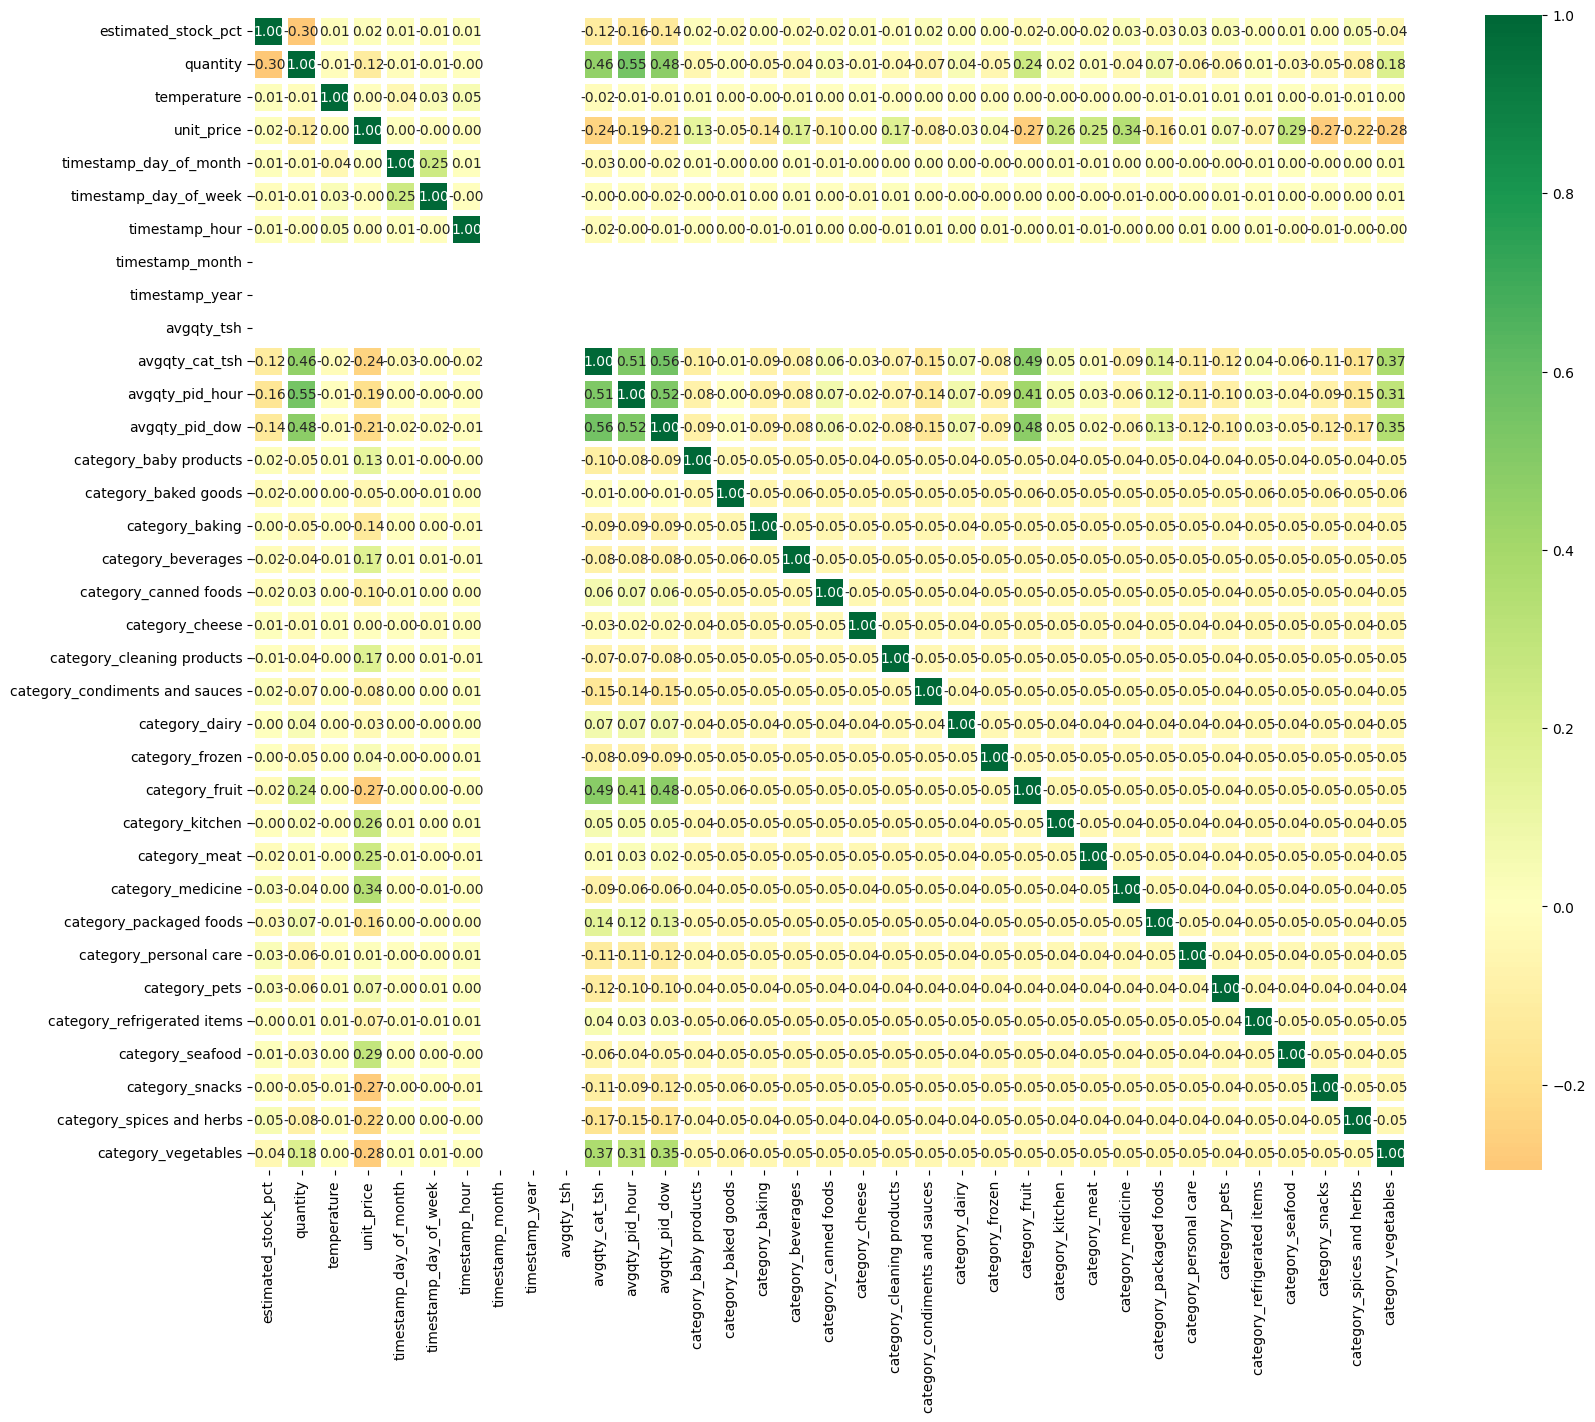

In [ ]:
# Correlation

import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(merged_df.corr(numeric_only=True),cmap="YlGnBu", annot=True)
plt.figure(figsize=(20,15))
#mask = np.zeros_like(merged_df.corr())
#mask[np.triu_indices_from(mask)]=True
sns.heatmap(merged_df.corr(), annot=True,center=0,fmt='.2f', square=True,linewidth=3, cmap='RdYlGn')
plt.show()

## Section 7 - Model Building

### Split into X and Y

In [ ]:
X = merged_df.drop('estimated_stock_pct', axis=1)
X.shape

(13995, 34)

In [ ]:
y = merged_df['estimated_stock_pct']
y.shape

(13995,)

### Split into Train and Test datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

### Build Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


# Scale X data, we scale the data because it helps the algorithm to converge
 # and helps the algorithm to not be greedy with large values
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define model

rfr_model = RandomForestRegressor(random_state=42)

# Fit model
rfr_model.fit(X_train, y_train)

#Predict
rfr_pred = rfr_model.predict(X_test)



### Metrics

In [ ]:
 # Metrics
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error: ", round(mean_absolute_error(y_test, rfr_pred),2))

Mean Absolute Error:  0.26


In [ ]:
# Mean of target from training dataset
y_train.mean()

0.38953572704537337

### Important Features


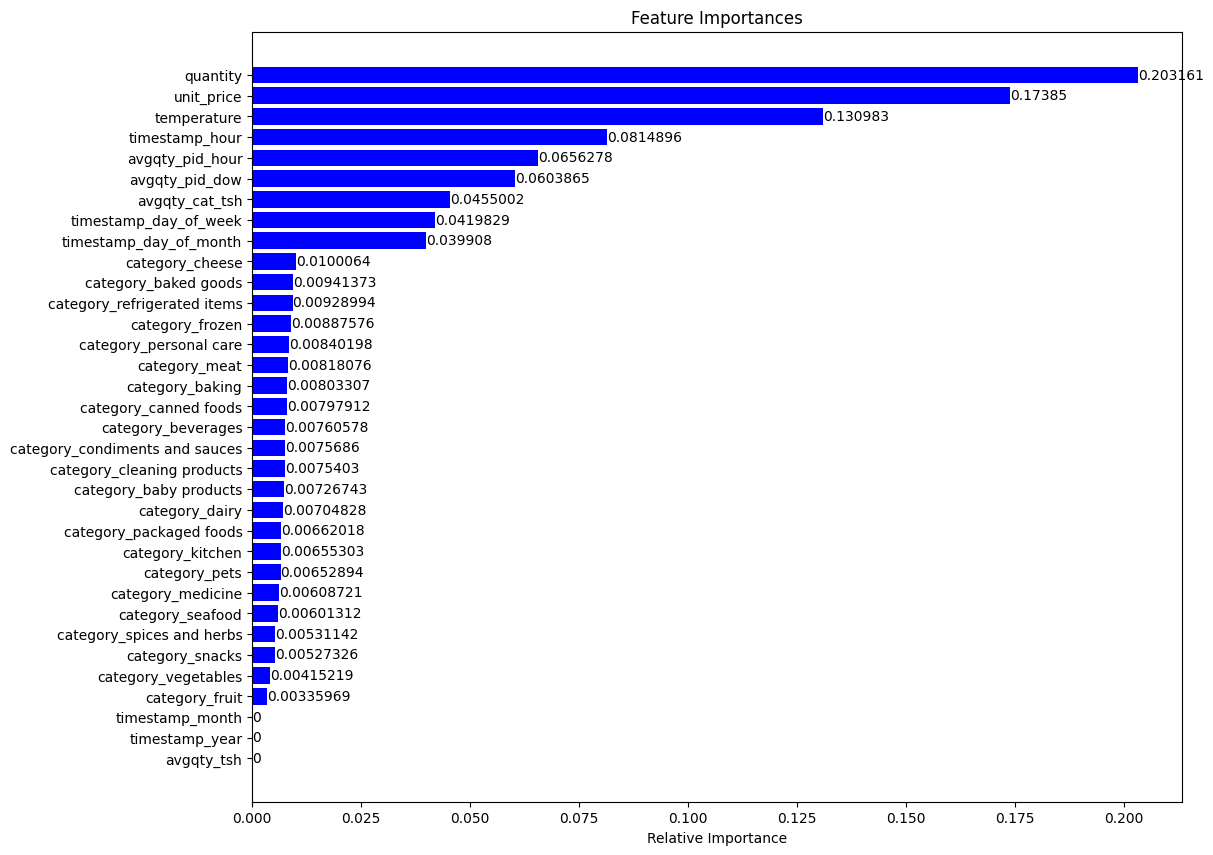

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

features = [i.split("__")[0] for i in X.columns]
importances = rfr_model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
ax.bar_label(ax.containers[0])
plt.show()

The following features were important in predicting estimated_stock_pct:
* The product category was not important
* Quantity was the most important feature followed by unit price (2nd), temperature (3rd), and timestamp hour(4th).


## Limitations

* The client only provided one week's worth of sales data.
* 49% of items sold did not have any stock level.  The client wanted to predict stock level based on sales data.
  




In [ ]:
# write cleaned file to csv
merged_df[['quantity','unit_price','temperature','timestamp_hour','avgqty_pid_hour','avgqty_pid_dow','avgqty_cat_tsh','timestamp_day_of_week','timestamp_day_of_month','estimated_stock_pct']].to_csv("/content/gala.csv",index=False)